<a href="https://colab.research.google.com/github/chenant2017/MathModeling/blob/main/JobData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gspread
!pip install beautifulsoup4
!pip install html2text

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [ ]:
import gspread
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import metrics

auth.authenticate_user()

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1hjSjbaSv-iCy-NMWyC_xsRPZAQTkAh6UuLb93rZ25Ks/edit#gid=1954645479')
sheet = wb.worksheet('Website 2')
data = sheet.get_all_records()
rdf = pd.DataFrame(data)

In [ ]:
urls = rdf.URL.values.tolist()
descriptions = rdf.Description.values.tolist()

In [ ]:
from urllib import request
import re
from IPython import display
from time import sleep
from bs4 import BeautifulSoup
import html2text

def read_url(url):
  sleep(1)
  return request.urlopen(url)

def read_page(link):
  f = read_url(link)
  url_info = []
  row = 0
  pattern = re.compile("(?:.*jobmap\[\d+\].*jk:')(?P<jk>[^']+).*")
  while True:
    line = f.readline().decode('utf-8')
    if not line:
      break
    m = pattern.match(line)
    if m:
      url_info.append(m.group("jk"))
      row += 1
  return url_info

def fetch_job_data(page_url):
  f = read_url(page_url)
  lines = []
  while True:
    line = f.readline().decode('utf-8')
    if not line:
      break
    lines.append(line)
  return lines


def find_fields(source, field):
  pattern = re.compile('(?:.*"' + str(field) + '":")(?P<x>[^"]*)"')
  for line in source:
    m = pattern.match(line)
    if m:
      return m.group("x")
  return ""

def find_array_field(source, field):
  pattern = re.compile('(?:.*"' + str(field) + '":\[)(?P<x>[^\]]*)\]')
  for line in source:
    m = pattern.match(line)
    if "Temporary" in line:
      print (line, m)
    if m:
      return m.group("x")
  return ""

def get_description(source):
  soup = BeautifulSoup("\n".join(source))
  return html2text.html2text("<html>{}</html>".format(soup.find(id="jobDescriptionText")))

def export_column(sheet, values, column="A", start_row=1):
  range = "{c}{start}:{c}{end}".format(c=column, start=start_row, end=start_row+len(values)-1)
  cell_list = sheet.range(range)
  for i, val in enumerate(values):
    cell_list[i].value = str(val)
  sheet.update_cells(cell_list)

In [ ]:
y_kmeans

array([ 9,  5,  5,  6,  8,  6,  4, 11,  2,  7, 12,  8,  6,  5,  3,  3,  1,
        7,  3,  7,  6,  1,  4,  3,  9, 12,  4,  5,  6,  6, 10, 11,  6,  6,
       11,  8, 11,  4,  6,  5,  5,  1,  6, 10, 10,  5,  6,  9,  4,  6,  1,
        8, 12,  2,  8, 12,  0,  8,  8,  1, 10,  3,  0,  8,  2,  3,  0, 10,
        8,  0,  0,  7,  3,  6, 10,  1,  3,  5, 11,  1, 10,  9,  8,  6,  3,
        7,  1, 10,  3,  2,  8,  7,  7,  3, 11,  2,  8, 10,  8,  5,  2, 11,
        5,  1,  7, 12,  3,  8,  8,  8,  2,  6,  3,  5,  8,  8,  3,  5,  3,
        3,  8,  7, 12,  3,  8,  3,  1,  4,  1,  7,  2,  6,  3,  0,  1,  1,
        6,  8, 11, 10,  4,  5,  0, 12, 12,  8,  1, 12,  1,  8, 12,  8,  0,
        8,  2], dtype=int32)

In [ ]:
sheet

<Worksheet 'Website 2' id:1954645479>

In [ ]:
export_column(sheet, y_kmeans, "F", 2)

In [ ]:
### DON'T RUN AGAIN ###
data = []
i = 1
for link in urls:
  data.append(fetch_job_data(link))
  print(i)
  i += 1


In [ ]:
descriptions = [get_description(data[x]) for x in range(len(data))]

In [ ]:
export_column(sheet, descriptions, "E", 2)

In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 71kB 3.6MB/s 
     |████████████████████████████████| 1.1MB 8.4MB/s 
     |████████████████████████████████| 3.0MB 38.8MB/s 
     |████████████████████████████████| 1.1MB 44.2MB/s 
     |████████████████████████████████| 890kB 23.1MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.8-cp36-none-any.whl size=101996 sha256=f0e736685f47725dc06b2273e597fa019243a9b158da4d3a6cc69830e92dc188
  Stored in directory: /root/.cache/pip/wheels/27/ec/b3/d12cc8e4daf77846db6543033d3a5642f204c0320b15945647
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=4b1ede25ccbd6f19b94dc12d6aa0ffeb8a2cb6a7401a8e69a7b92678371bb20b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')


100%|██████████| 405M/405M [00:46<00:00, 8.76MB/s]


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### NLP1: remove stop word
import re

def clean_one_doc(x, stop_words):
  return " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words)

# removing special characters and stop words from the text
def clean_doc(doc_list, stop_words):
  return [clean_one_doc(x, stop_words) for x in doc_list]

def bert_embedding(doc_list, stop_words):
  return sbert_model.encode(clean_doc(doc_list, stop_words))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

stop_words_1=stopwords.words('english')
vecs = bert_embedding(descriptions, stop_words_1)

In [ ]:
vecs.shape

(155, 768)

In [ ]:
X = cosine_similarity(vecs)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=13)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
rdf["K=13"] = y_kmeans

In [ ]:
"""
Copied from https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
"""
def calculate_WSS(points, kmax=50):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0

    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2

    sse.append(curr_sse)
  return sse

In [ ]:
wss = calculate_WSS(X, 100)
wss

[1.8898975175074435,
 1.8025939208287527,
 1.627819594117601,
 1.5250190908188168,
 1.4559700480885613,
 1.080578192000634,
 1.0937710046800833,
 0.9497051805764345,
 0.7766570395863557,
 1.0835109883065375,
 1.0265869719847398,
 0.7743517602075336,
 0.9006328100807304,
 0.6527497238419189,
 0.6529983339631151,
 0.6332959415181882,
 0.6176579551896548,
 0.6397465615655236,
 0.6018530697801499,
 0.6152852872734131,
 0.6029278471280293,
 0.5593744836446071,
 0.5699355908305446,
 0.5180782999653006,
 0.4821354765232613,
 0.4370175092092268,
 0.4501105173515061,
 0.4534498030072598,
 0.44625409282937056,
 0.47454975869735705,
 0.4968969641439518,
 0.4528427366269563,
 0.4150269976709424,
 0.4209821643536875,
 0.4297681865651084,
 0.4693788303482469,
 0.4278483955744852,
 0.37429354312747165,
 0.36550739039746993,
 0.34378087145965175,
 0.33834970927973274,
 0.33999940218352087,
 0.321993197745007,
 0.30988157973486885,
 0.2763309767490387,
 0.3025483690957893,
 0.2780267108763219,
 0.26566

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


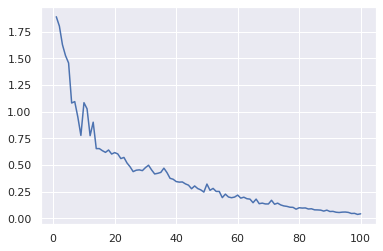

In [ ]:
sns.lineplot(range(1, 101), wss)

In [ ]:
[10, 20, 50, 100, 200, 500] + list(range(1000, 10001, 1000))

[10,
 20,
 50,
 100,
 200,
 500,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000]